<a href="https://colab.research.google.com/github/MinkEJJ/Sentiment_Analysis/blob/main/%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D_%EA%B0%90%EC%A0%95%EC%96%B4%ED%9C%98%EC%82%AC%EC%A0%84_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정분석 실습(Sentiment Analysis)

afinn 라이브러리를 활용하여 감정 어휘사전을 생성후 특정 데이터의 감정상태를 분류하는 실습.
이를 통해 영문 감정 어휘사전의 결과를 확인한 후 긍/중/부정의 감정가를 판단하는 과정을 학습한다.

In [ ]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=726e6aa276d82b981dc493cd286f63a8343779c01d25237dab65609b1536480b
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset = 'train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
from afinn import Afinn
afinn = Afinn()
for i in range(10):
  print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


<ipython-input-5-d70d7917949e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


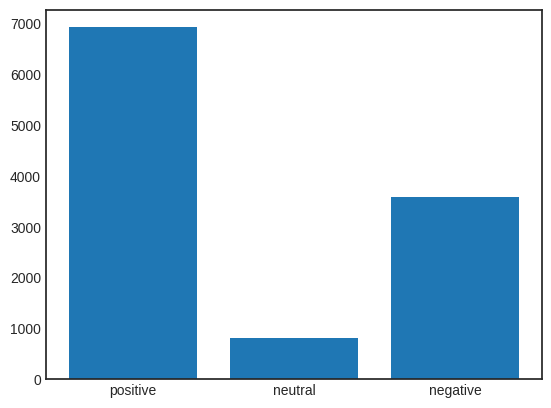

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive= 0
negative = 0
neutral = 0

for i in newsdata.data:
  score = afinn.score(i)
  if score > 0:
    positive += 1
  elif score == 0:
    neutral += 1
  else:
    negative += 1
plt.bar(np.arange(3),[positive,neutral,negative])
plt.xticks(np.arange(3),['positive','neutral','negative'])
plt.show()

참고자료 : https://www.youtube.com/watch?v=7GUoDHxN5NM